
# YOLOv10 Object Detection on a Custom Dataset


In [22]:
!nvidia-smi

Sun Jul 28 21:03:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |    199MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [23]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv10

In [24]:
!pip install -q supervision

In [26]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Download pre-trained weights

In [27]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 815M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt.1
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt.1
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt.1
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt.1
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt.1
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt.1


## Download dataset from Roboflow Universe

In [31]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JLmVp2wySed50eBWkn7n")
project = rf.workspace("carai-brmgd").project("signandlights")
version = project.version(12)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SignAndLights-12 in yolov9:: 100%|██████████| 4702/4702 [00:01<00:00, 3065.30it/s]


## Custom Training

In [32]:
%cd {HOME}

!yolo task=detect mode=train epochs=25 batch=8 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/SignAndLights-12/data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [36]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


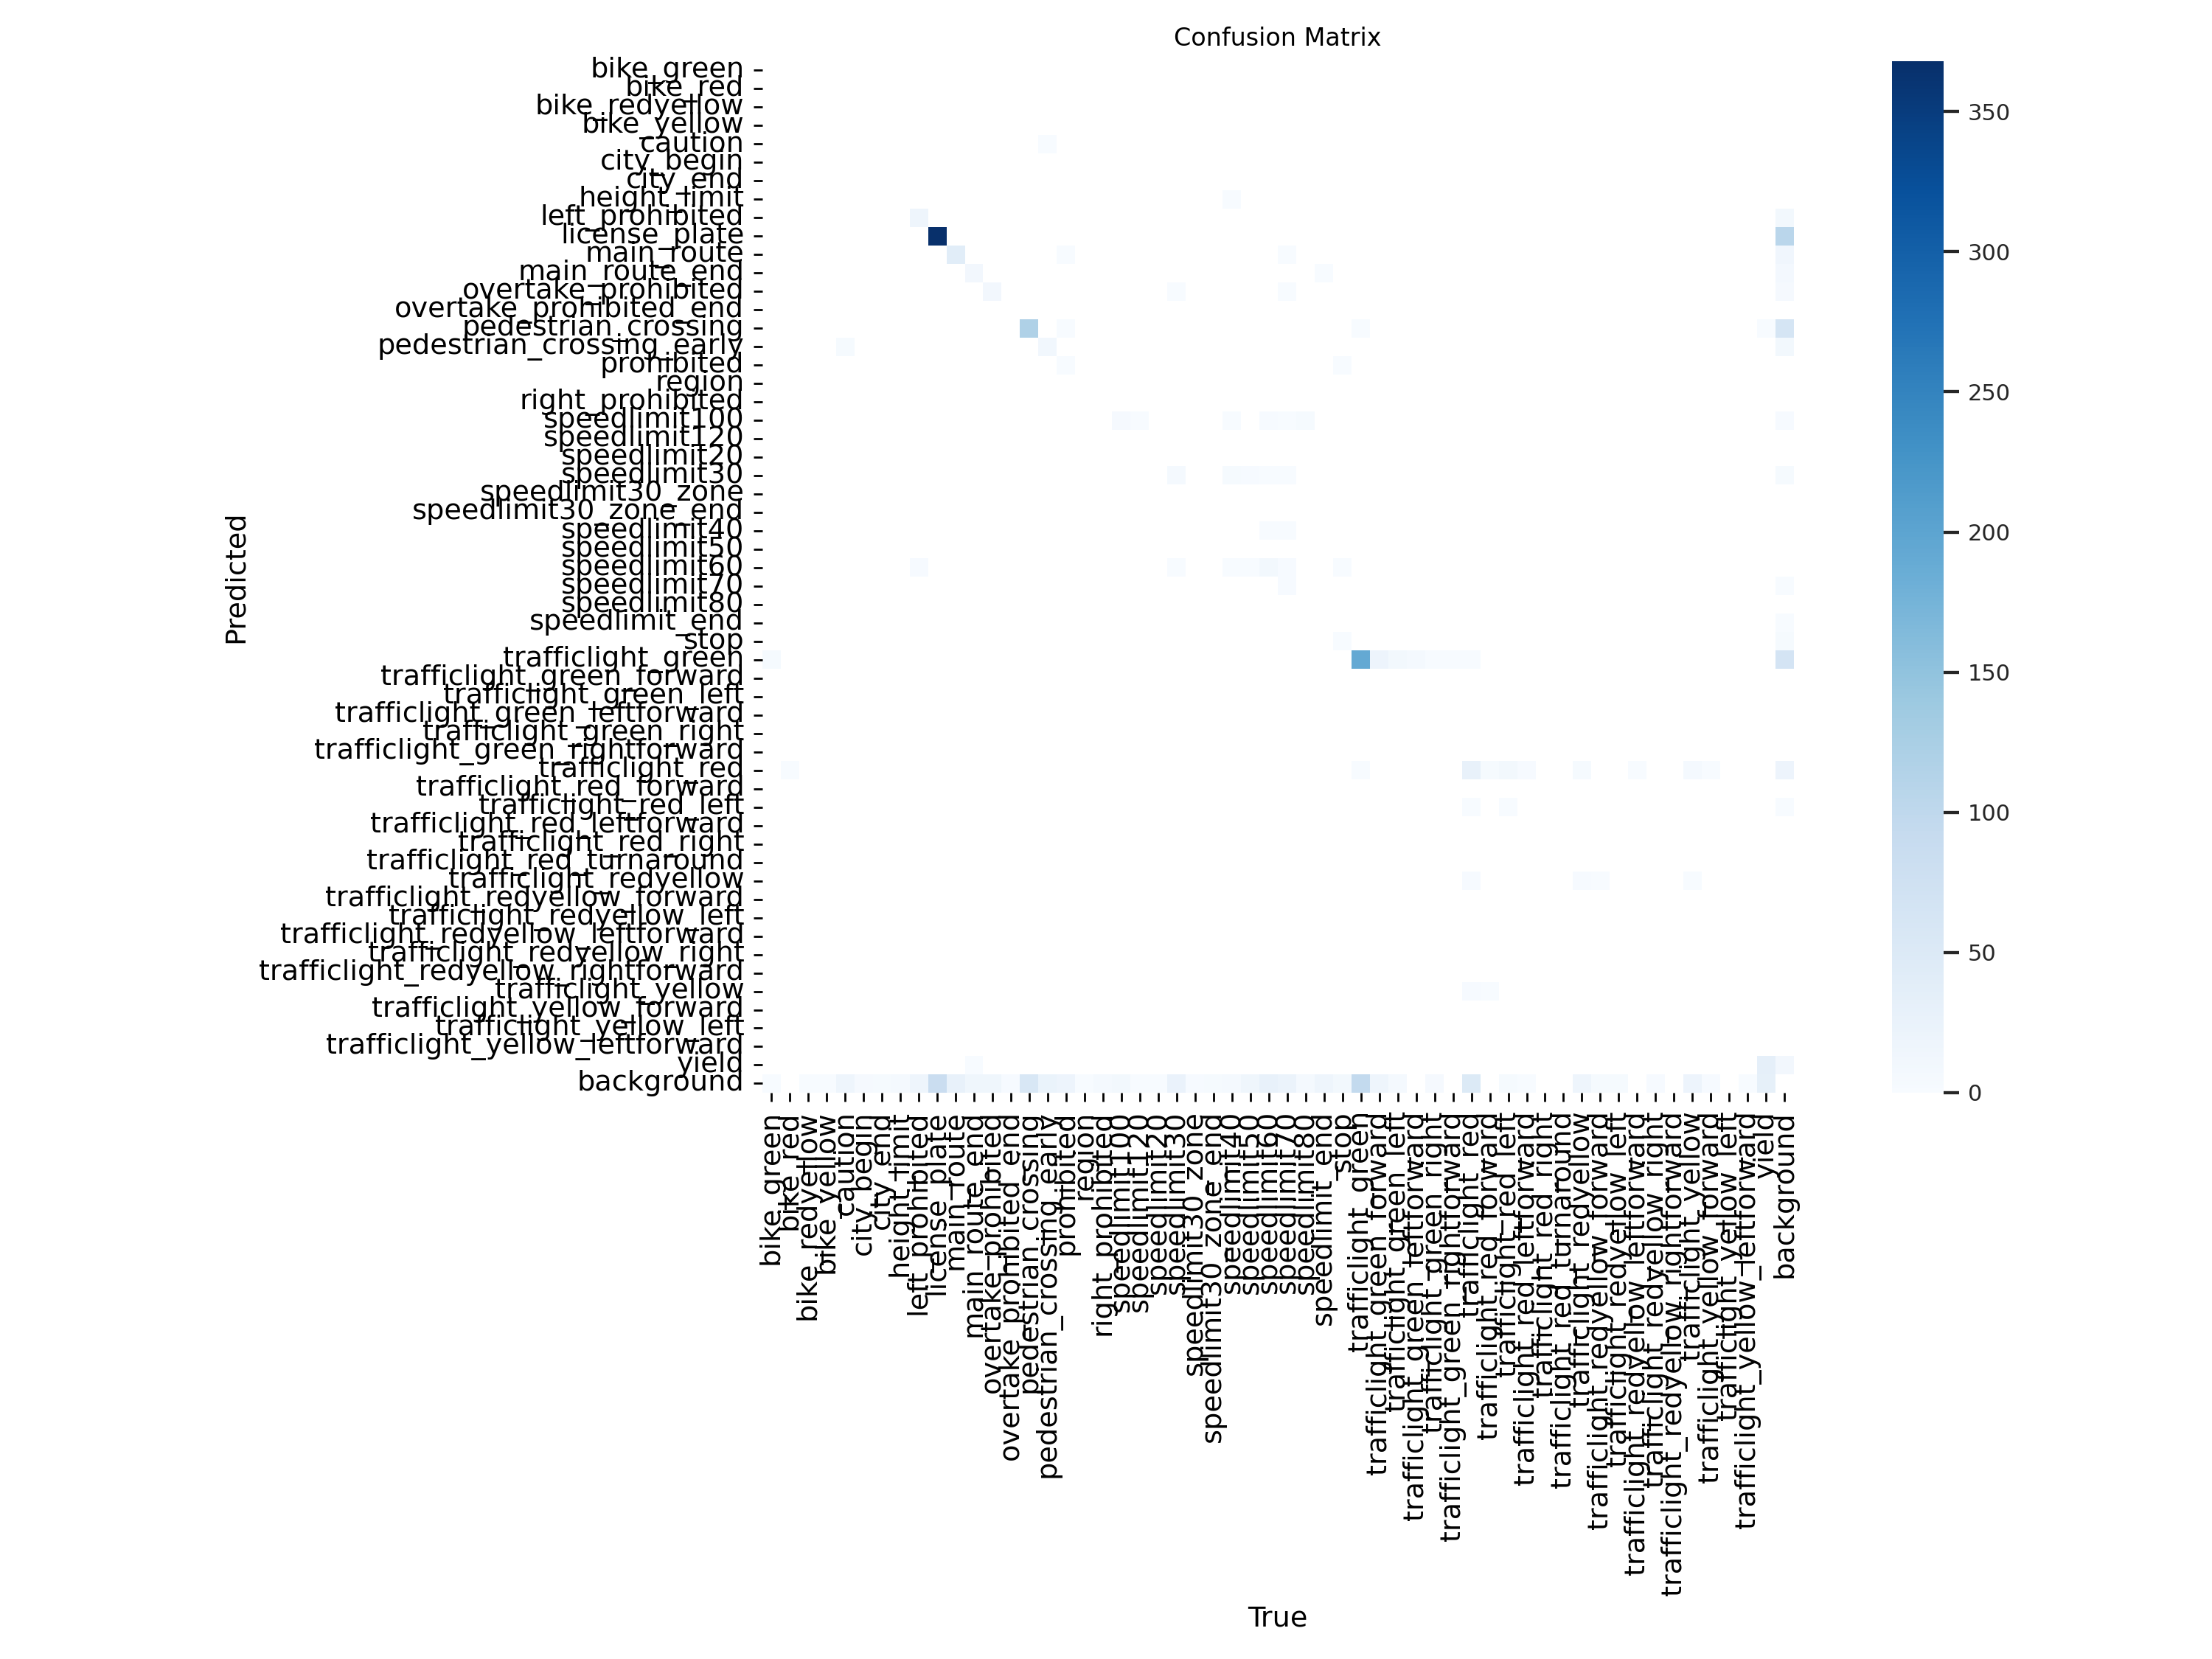

In [40]:
from IPython.display import Image

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train10/confusion_matrix.png', width=800)

/content


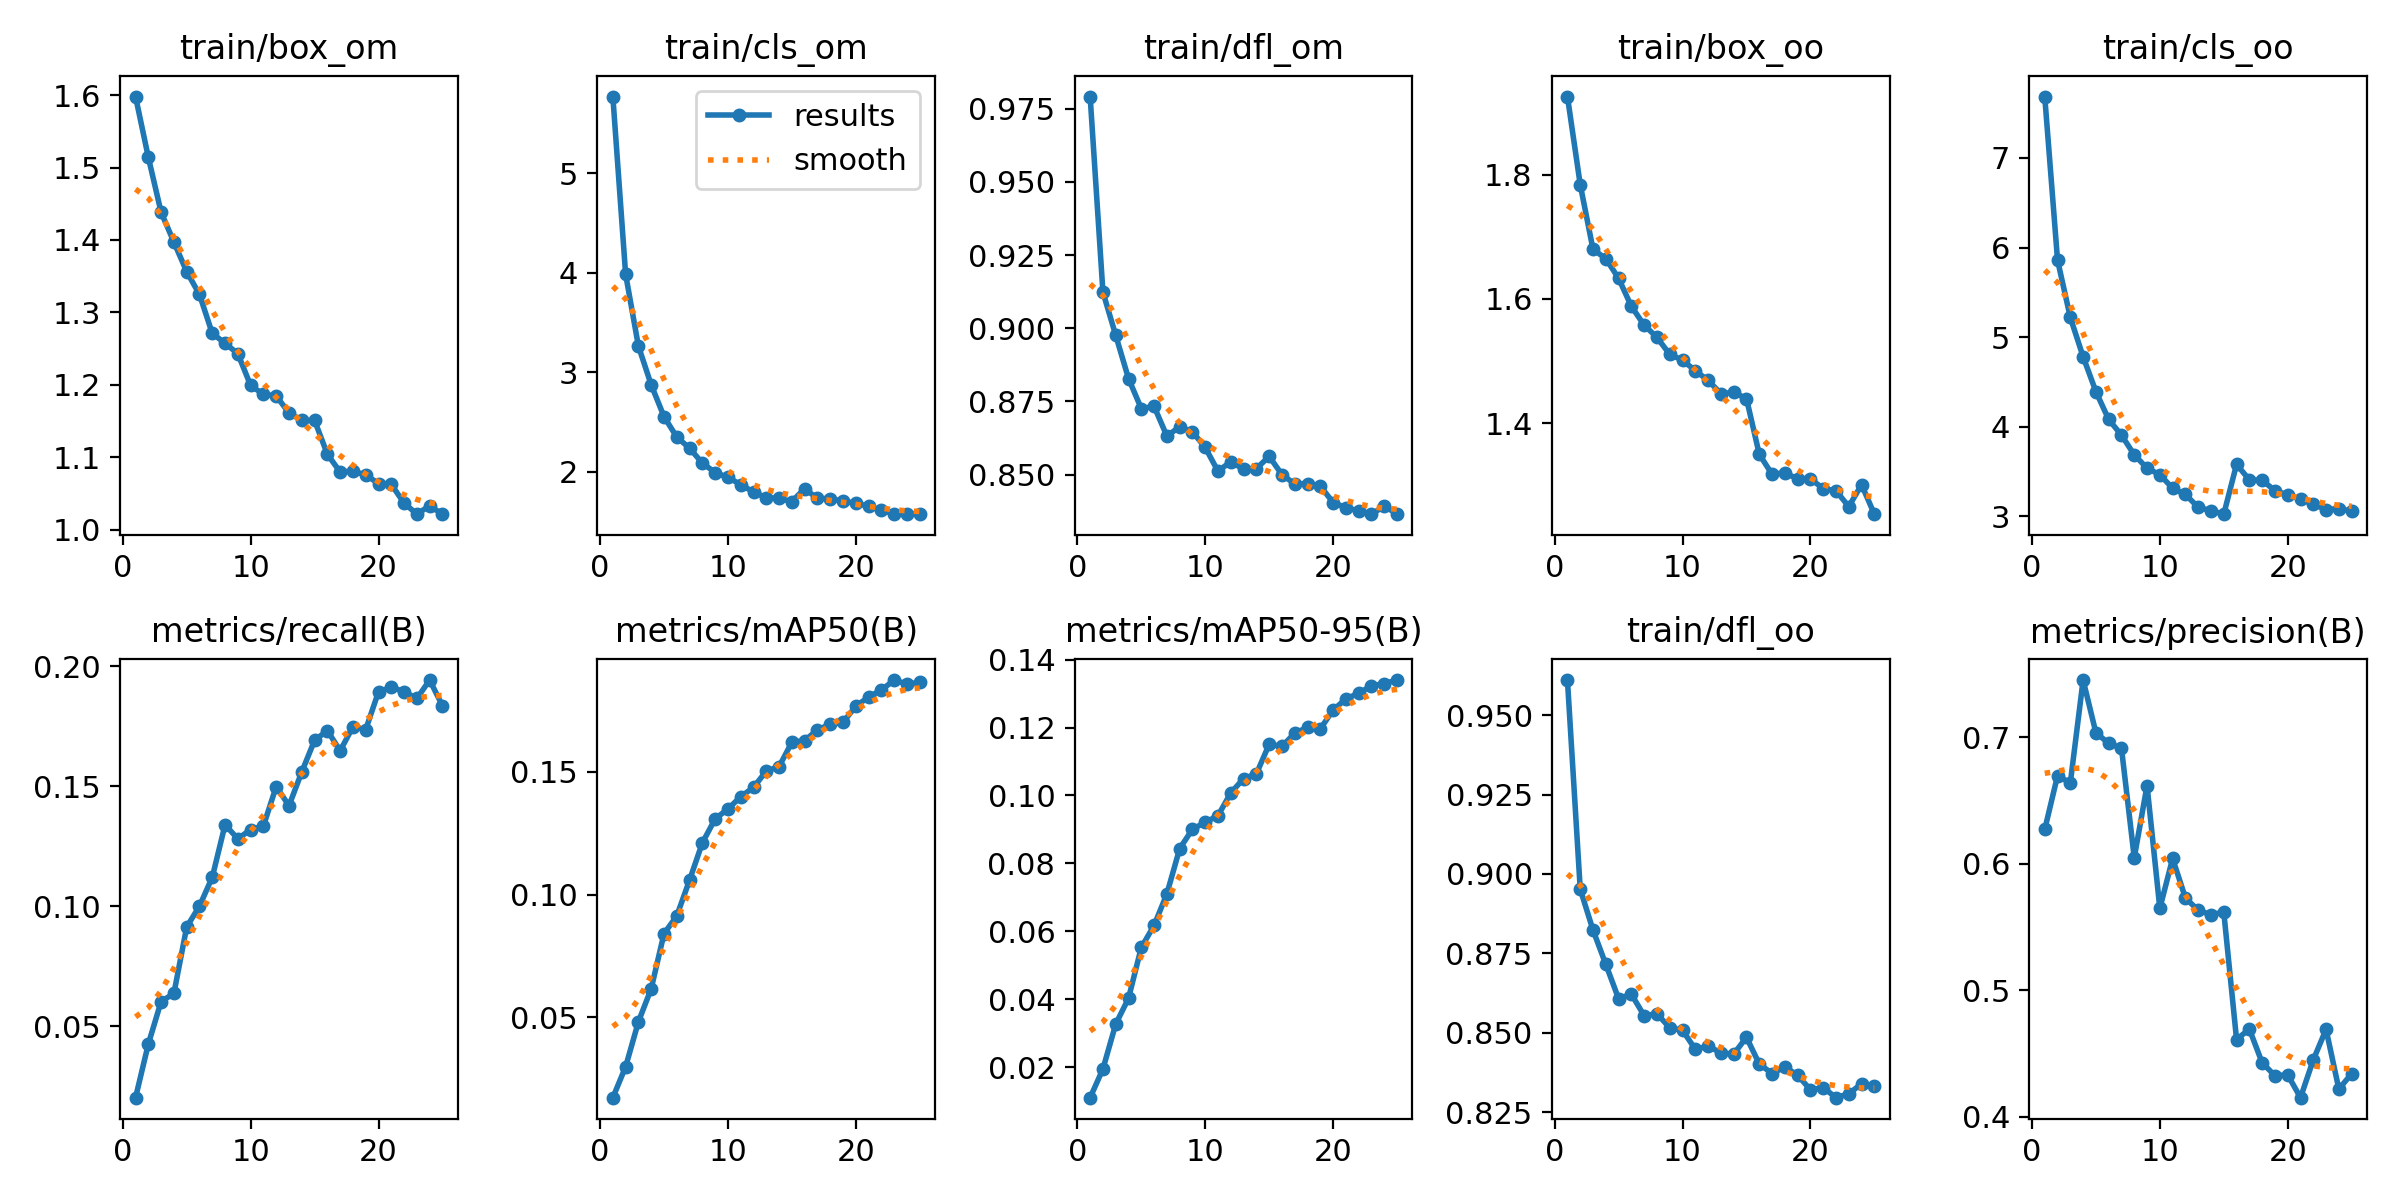

In [39]:


%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train10/results.png', width=600)